## Clustering Wheat Seeds with Kmeans Clustering

In this notebook, we're going to analyze seeds dataset from the UCI Machine Learning Repository ( https://archive.ics.uci.edu/ml/datasets/seeds ). This dataset has a label on them, but since we use this dataset for clustering, we measure the model's precision by the available labels. the seeds belongs to 3 different variants: Kama, Rosa, and Canadian.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [2]:
#load the dataset
seeds_df = pd.read_csv('seeds_dataset.csv')

#data column
seeds_df.columns = ['ID', 'area', 'perimeter', 'compactness', 'lengthOfKernel', 'widthOfKernel', 'asymmetryCoefficient', 
                    'lengthOfKernelGroove', 'seedType']

seeds_df.head(5)

ID   area  perimeter  compactness  lengthOfKernel  widthOfKernel  \
0   1  15.26      14.84       0.8710           5.763          3.312   
1   2  14.88      14.57       0.8811           5.554          3.333   
2   3  14.29      14.09       0.9050           5.291          3.337   
3   4  13.84      13.94       0.8955           5.324          3.379   
4   5  16.14      14.99       0.9034           5.658          3.562   

   asymmetryCoefficient  lengthOfKernelGroove  seedType  
0                 2.221                 5.220         1  
1                 1.018                 4.956         1  
2                 2.699                 4.825         1  
3                 2.259                 4.805         1  
4                 1.355                 5.175         1

In [3]:
print('This dataset has {} observations with {} features'.format(seeds_df.shape[0], seeds_df.shape[1]))

This dataset has 210 observations with 9 features


In [4]:
#drop ID attribute
seeds = seeds_df.copy()
seeds.drop('ID', axis = 1, inplace = True)

seeds.head(5)

area  perimeter  compactness  lengthOfKernel  widthOfKernel  \
0  15.26      14.84       0.8710           5.763          3.312   
1  14.88      14.57       0.8811           5.554          3.333   
2  14.29      14.09       0.9050           5.291          3.337   
3  13.84      13.94       0.8955           5.324          3.379   
4  16.14      14.99       0.9034           5.658          3.562   

   asymmetryCoefficient  lengthOfKernelGroove  seedType  
0                 2.221                 5.220         1  
1                 1.018                 4.956         1  
2                 2.699                 4.825         1  
3                 2.259                 4.805         1  
4                 1.355                 5.175         1

In [5]:
seeds.describe()

area   perimeter  compactness  lengthOfKernel  widthOfKernel  \
count  210.000000  210.000000   210.000000      210.000000     210.000000   
mean    14.847524   14.559286     0.870999        5.628533       3.258605   
std      2.909699    1.305959     0.023629        0.443063       0.377714   
min     10.590000   12.410000     0.808100        4.899000       2.630000   
25%     12.270000   13.450000     0.856900        5.262250       2.944000   
50%     14.355000   14.320000     0.873450        5.523500       3.237000   
75%     17.305000   15.715000     0.887775        5.979750       3.561750   
max     21.180000   17.250000     0.918300        6.675000       4.033000   

       asymmetryCoefficient  lengthOfKernelGroove    seedType  
count            210.000000            210.000000  210.000000  
mean               3.700201              5.408071    2.000000  
std                1.503557              0.491480    0.818448  
min                0.765100              4.519000    1.000000  
25%                2.561500              5.045000    1.000000  
50%                3.599000              5.223000    2.000000  
75%                4.768750              5.877000    3.000000  
max                8.456000              6.550000    3.000000

In [6]:
seeds.isnull().sum()

area                    0
perimeter               0
compactness             0
lengthOfKernel          0
widthOfKernel           0
asymmetryCoefficient    0
lengthOfKernelGroove    0
seedType                0
dtype: int64

In [7]:
np.any(np.isnan(seeds))

False

In [13]:
seeds_df['seedType'].nunique()

3

In [14]:
import pandas_profiling as pp
pp.ProfileReport(seeds_df)

### key insight:
- this dataset has 8 attributes(ID excluded) include seeds label.
- the seedType has 3 unique value which means that the seeds have 3 class snd each has 70 tuples
- the dataset has no null value

### Perform PCA

In [250]:
features = ['area', 'perimeter', 'compactness', 'lengthOfKernel', 'widthOfKernel', 'asymmetryCoefficient', 
            'lengthOfKernelGroove' ]

# Separating out the features
X = seeds.loc[:, features].values

# Separating out the target
y = seeds.loc[:,['seedType']].values

In [251]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data to have a mean of ~0 and a variance of 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [252]:
# Create a PCA instance: pca
X_pca7 = PCA(n_components=7)
principalComponents7 = X_pca7.fit_transform(X_scaled)

([<matplotlib.axis.XTick at 0x2271411a128>,
 <a list of 7 Text xticklabel objects>)

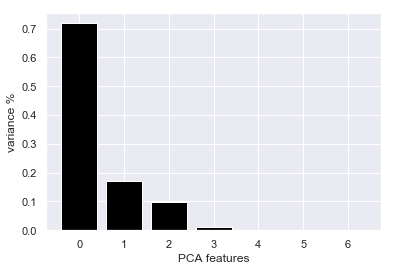

In [253]:
# Plot the explained variances
features = range(X_pca7.n_components_)
plt.bar(features, X_pca7.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [254]:
# Create a PCA instance: pca
X_pca = PCA(n_components=3)
principalComponents = X_pca.fit_transform(X_scaled)

([<matplotlib.axis.XTick at 0x22714a4a4a8>,
 <a list of 3 Text xticklabel objects>)

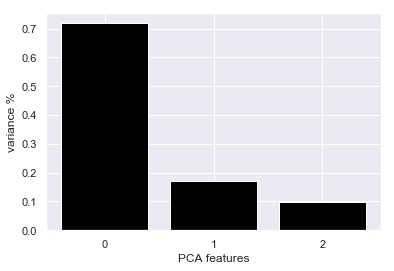

In [255]:
# Plot the explained variances
features = range(X_pca.n_components_)
plt.bar(features, X_pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [256]:
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 2')

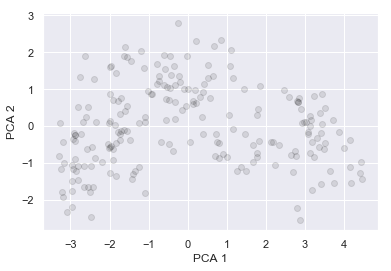

In [257]:
#visualisasi 2d pca
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

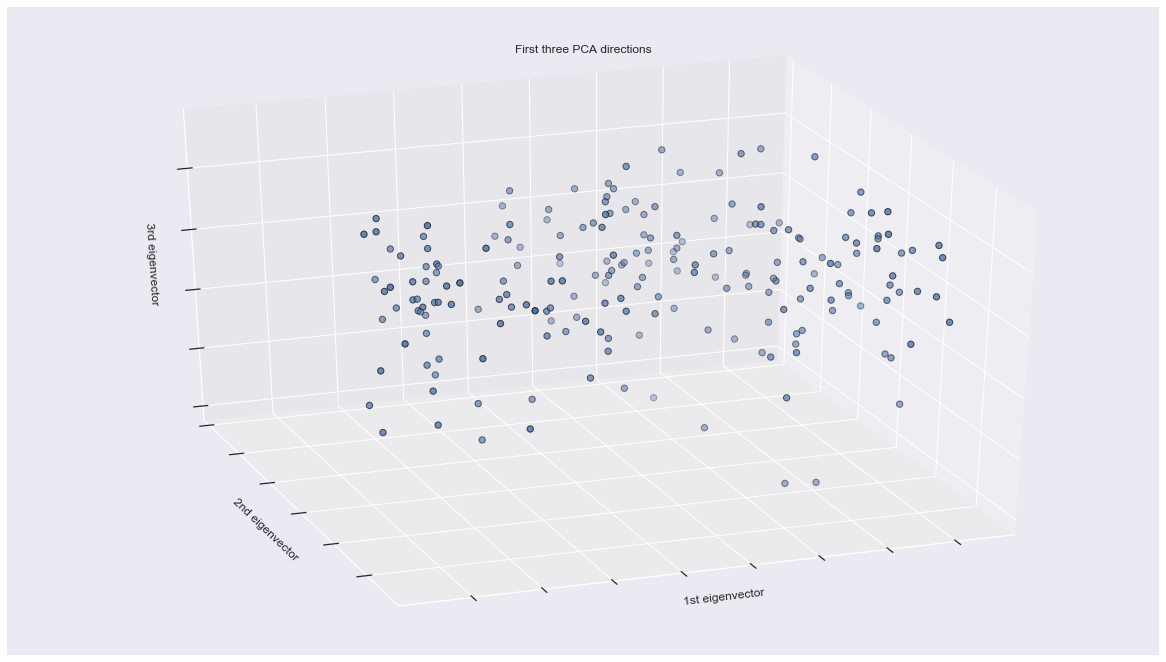

the number of features in the new subspace is  3


In [258]:
#visualisasi 3d pca
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(16,9))
ax = Axes3D(fig, elev=-150, azim=110)

ax.scatter(PCA_components[0], PCA_components[1], PCA_components[2],
          cmap=plt.cm.Set1, edgecolor='k', s=40)

ax.set_title('First three PCA directions')
ax.set_xlabel('1st eigenvector')
ax.w_xaxis.set_ticklabels([])

ax.set_ylabel('2nd eigenvector')
ax.w_yaxis.set_ticklabels([])

ax.set_zlabel('3rd eigenvector')
ax.w_zaxis.set_ticklabels([])

plt.show()
print('the number of features in the new subspace is ', X_reduced.shape[1])

## Find The Clusters

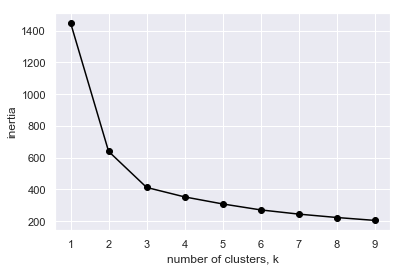

In [298]:
#use inertia
from sklearn.cluster import KMeans

ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [299]:
#choose k=3
#‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
kmeans_pca = KMeans(n_clusters = 3, init='k-means++')

In [302]:
#fit the data 
kmeans_pca = kmeans_pca.fit(PCA_components)

centroids = kmeans_pca.cluster_centers_

In [303]:
#Use silhouette score
from sklearn.metrics import silhouette_score

range_n_clusters = list (range(2,10))
print ("Number of clusters from 2 to 9: \n", range_n_clusters)

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(PCA_components)
    centers = clusterer.cluster_centers_

    score = silhouette_score(PCA_components, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

Number of clusters from 2 to 9: 
 [2, 3, 4, 5, 6, 7, 8, 9]
For n_clusters = 2, silhouette score is 0.4730808939247534)
For n_clusters = 3, silhouette score is 0.4100823639350388)
For n_clusters = 4, silhouette score is 0.3456980307065038)
For n_clusters = 5, silhouette score is 0.3010655479014096)
For n_clusters = 6, silhouette score is 0.2946770448532754)
For n_clusters = 7, silhouette score is 0.295068044616976)
For n_clusters = 8, silhouette score is 0.2890510734353405)
For n_clusters = 9, silhouette score is 0.2620994994598042)


### kmeans clustering with pca results

In [264]:
#create new dataframe with original features and PCA scores and assigned clusters
kmeans_pca_df = pd.concat([seeds_df.reset_index(drop = True), PCA_components], axis = 1)
kmeans_pca_df.columns.values[-3:] = ['Component 1', 'Component 2', 'Component 3']
kmeans_pca_df['Segments Kmeans PCA'] = kmeans_pca.labels_

kmeans_pca_df.head(5)

ID   area  perimeter  compactness  lengthOfKernel  widthOfKernel  \
0   1  15.26      14.84       0.8710           5.763          3.312   
1   2  14.88      14.57       0.8811           5.554          3.333   
2   3  14.29      14.09       0.9050           5.291          3.337   
3   4  13.84      13.94       0.8955           5.324          3.379   
4   5  16.14      14.99       0.9034           5.658          3.562   

   asymmetryCoefficient  lengthOfKernelGroove  seedType  Component 1  \
0                 2.221                 5.220         1     0.317047   
1                 1.018                 4.956         1    -0.003386   
2                 2.699                 4.825         1    -0.459443   
3                 2.259                 4.805         1    -0.591936   
4                 1.355                 5.175         1     1.102910   

   Component 2  Component 3  Segments Kmeans PCA  
0     0.783669    -0.631010                    2  
1     1.913214    -0.669754                    2  
2     1.907225     0.932489                    2  
3     1.931069     0.499311                    2  
4     2.068090     0.056705                    2

In [265]:
#add names of the segments to the label
kmeans_pca_df['Segment'] = kmeans_pca_df['Segments Kmeans PCA'].map({0: 'first', 1: 'second', 2:'third'})

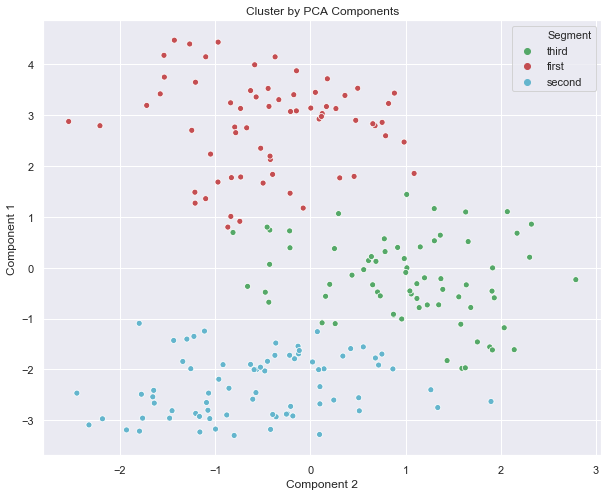

In [274]:
# 2d visualize the segments
x_axis = kmeans_pca_df['Component 2']
y_axis = kmeans_pca_df['Component 1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue= kmeans_pca_df['Segment'], palette=['g', 'r', 'c'] )

plt.title('Cluster by PCA Components')
plt.show()

In [365]:
#matching each learned cluster label with the true labels from dataset
from scipy.stats import mode

clusters = kmeans_pca.labels_
labels = np.zeros_like(clusters)

target = kmeans_pca_df['seedType'].values

for i in range(3):
    mask = (clusters == i)
    labels[mask] = mode(target[mask])[0]
    
print(labels)
print(clusters)
print(target)

[1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 1 1 1 1 1 1 1 1 3 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 1 2 1 1 2 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 1 3 1 3 1 3 1 3 3 3 3 3 3 3 3]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 0 2 0 2 0 2 0 2 2 2 2 2 2 2 2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 

In [366]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy_score(target, labels)

0.9238095238095239

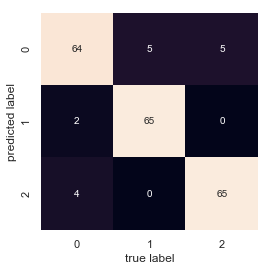

In [369]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

### insight:
We select the k cluster with the inertia and silhouette scores. In the inertia method, we choose three clusters by looking at the 'elbow' points on the inertia plot. Meanwhile, the silhouette score has the highest score for 2 clusters. In this case, the inertia method is more precise in selecting clusters, because we already know that this dataset has three types of wheat varieties.